# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EuroMart Sales & Profitability Analysis</p>

- Identify key factors influencing sales and profitability in different regions, product categories, and transaction types to optimize operations and pricing strategies.

- Identifying Top Performers: Pinpoint regions, product categories, and transaction types driving highest sales & profitability to replicate successful strategies.
- Understanding Challenges: Address operational inefficiencies and customer engagement issues in underperforming areas.
- Optimizing Discounts & Shipping Modes: Analyze impact of discounts and shipping modes to refine pricing strategies and logistics for max profitability.
- Leveraging Customer Feedback: Use customer feedback to enhance product offerings and improve overall business performance.
Improving Product Mix: Identify top-selling products and customer preferences to optimize our product mix.

**Note:-** 
- Remove null values and duplicates if Present.

### **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing the necessary libraries to establish a connection with the MySQL server, enabling exploratory data analysis (EDA) to gain insights from the dataset.

In [3]:
Conn = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="Sameer@786",               #password for user
  database="eda_practice",               #database name
)

### **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [4]:
query = "select * from euromart_stores;"

df = pd.read_sql(query,Conn)
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
 16  Feedback?      8047 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8047.0,0.110047,0.181773,0.0,0.0,0.0,0.1,0.85
Sales,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.00
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.00
Quantity,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.00


In [7]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [8]:
df.shape

(8047, 17)

In [9]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
for col in df.columns:
    print(df[col].unique())

['BN-2011-7407039' 'AZ-2011-9050313' 'AZ-2011-6674300' ...
 'AZ-2014-7604524' 'AZ-2014-766953' 'BN-2014-4140795']
['2011-01-01' '2011-01-03' '2011-01-04' ... '2014-12-29' '2014-12-30'
 '2014-12-31']
['Ruby Patel' 'Summer Hayward' 'Devin Huddleston' 'Mary Parker'
 'Daniel Burke' 'Fredrick Beveridge' 'Archer Hort' 'Evie Flockhart'
 'Faith Greenwood' 'Gracie Powell' 'Hershel Snyder' 'Julia Martell'
 'Viola Watson' 'Julian Dobie' 'Rose Heap' 'Ella Troy' 'Everett Dunbar'
 'Georgia Bermingham' 'Christopher Goold' 'John Baca' 'Kai Leonard'
 'Jennifer Mattingly' 'Nathan Iqbal' 'Noah Chamberlain' 'Dylan Disney'
 'Melissa Bean' 'Vaughn Gibbs' 'William Horton' 'David Harney'
 'Walter Coley' 'Lori Miller' 'Hayley Baldwinson' 'Joseph Locke'
 'Gracie Hicks' 'Hollie Norris' 'Kiara Allen' 'Ronald Everson'
 'Daryl Claypool' 'Caleb Kenyon' 'Winnie Moss' 'Courtney Hancock'
 'Brandon Preston' 'Lara Stoate' 'Max Ludwig' 'Millie Newman'
 'Larry Klaus' 'Shelby Dunston' 'Erin Gill' 'Piper Wilder-Neligan'
 'Pa

In [14]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

### removing Unnecessory columns

In [15]:
df.drop(['Order ID'],axis=1, inplace =True)

In [16]:
df.columns

Index(['Order Date', 'Customer Name', 'Country', 'State', 'City', 'Region',
       'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [17]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


### **Feature gineering**

In [18]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [19]:
df['Discount'] = df['Discount']*100
df['Discount'].astype('int')

0       50
1        0
2        0
3       50
4       50
        ..
8042     0
8043    50
8044    50
8045    50
8046     0
Name: Discount, Length: 8045, dtype: int32

In [20]:
df['Total_Sales'] = df['Sales'] * df['Quantity']
df['Total_Profit'] = df['Profit'] * df['Quantity']

In [21]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Total_Sales,Total_Profit
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45,-26,3,False,2011,1,135,-78
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1,5978,2030
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,2011,1,420,63
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",50.0,27,-22,2,True,2011,1,54,-44
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",50.0,17,-1,2,True,2011,1,34,-2


In [22]:
df['Year'].unique()

array([2011, 2012, 2013, 2014])

In [23]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [25]:
df['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
8042    Dec
8043    Dec
8044    Dec
8045    Dec
8046    Dec
Name: Month, Length: 8045, dtype: object

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8045.0,11.007458,18.178693,0.0,0.0,0.0,10.0,85.0
Sales,8045.0,291.903170,485.258616,3.0,48.0,117.0,313.0,6517.0
Profit,8045.0,35.202237,178.147747,-3060.0,1.0,14.0,47.0,2476.0
Quantity,8045.0,3.772281,2.203610,1.0,2.0,3.0,5.0,14.0
Year,8045.0,2012.728900,1.100367,2011.0,2012.0,2013.0,2014.0,2014.0
Total_Sales,8045.0,1479.008080,3726.216265,3.0,128.0,414.0,1274.0,80206.0
Total_Profit,8045.0,171.520199,1325.592598,-36720.0,1.0,40.0,182.0,29712.0


In [27]:
df.describe(include='object').T

,count,unique,top,freq
Order Date,8045,1214,2014-11-12,32
Customer Name,8045,792,Joel Peters,32
Country,8045,15,France,1916
State,8045,127,England,1187
City,8045,999,London,219
Region,8045,3,Central,4425
Segment,8045,3,Consumer,4173
Ship Mode,8045,4,Economy,4860
Category,8045,3,Office Supplies,5284
Sub-Category,8045,17,Art,1151


In [28]:
cat = df.select_dtypes(include='object').columns
num  = df.select_dtypes(exclude='object').columns.tolist()
print(cat)
print(num)

Index(['Order Date', 'Customer Name', 'Country', 'State', 'City', 'Region',
       'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name',
       'Feedback?', 'Month'],
      dtype='object')
['Discount', 'Sales', 'Profit', 'Quantity', 'Year', 'Total_Sales', 'Total_Profit']


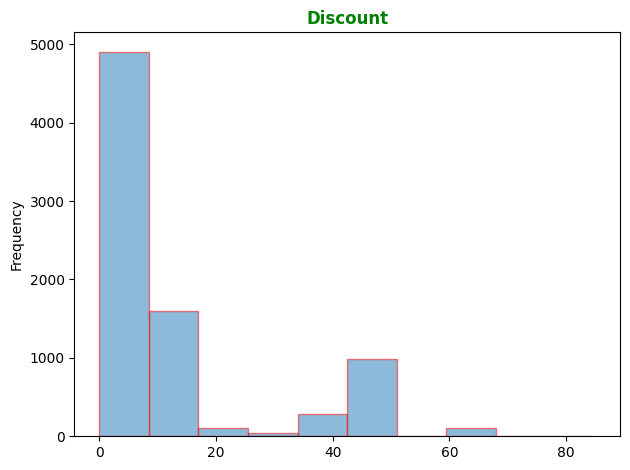

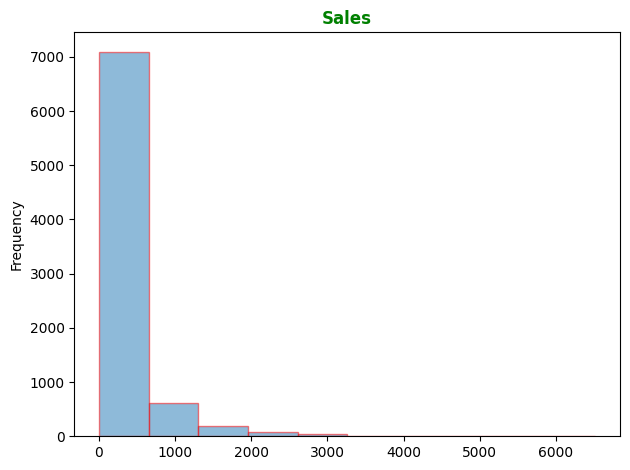

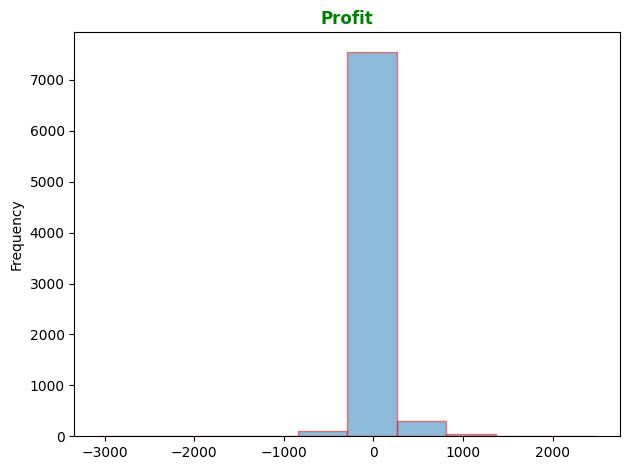

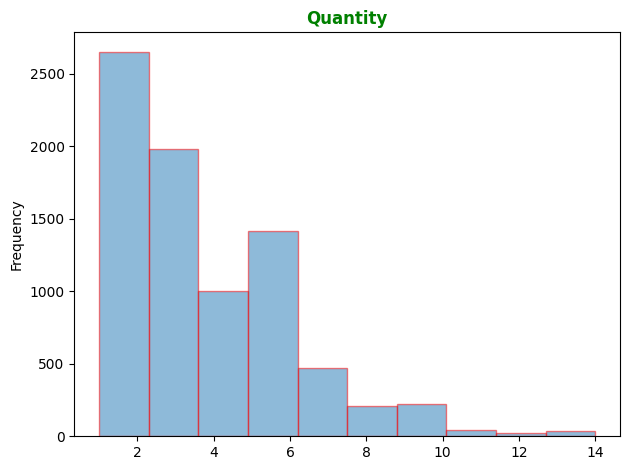

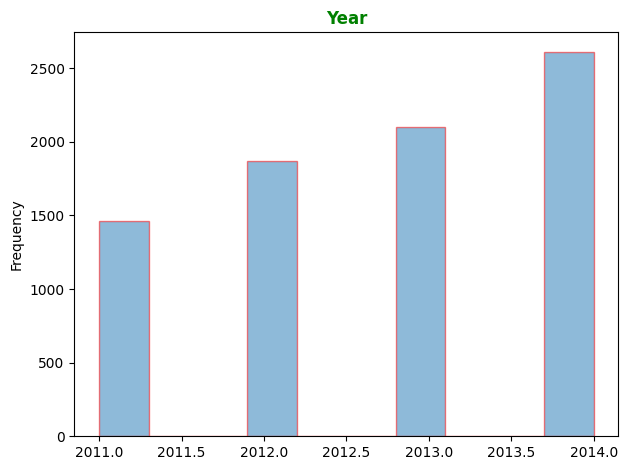

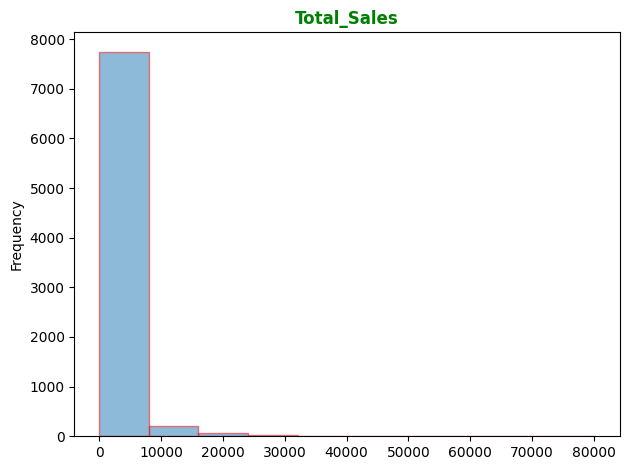

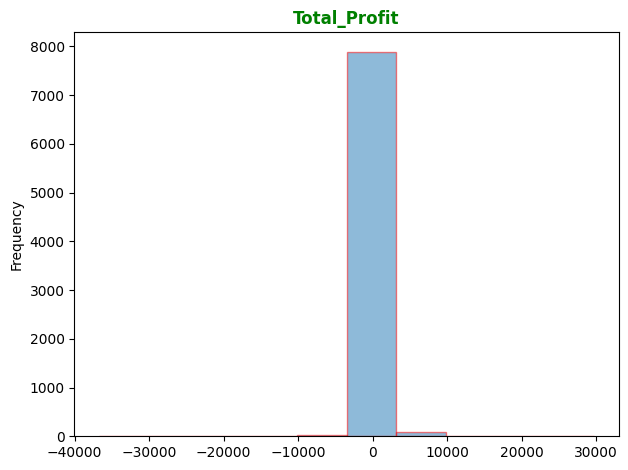

In [29]:
# Univariate Analysis fot numarical veriable
for col in num:
    plt.figure()
    plt.subplot(1,1,1)
    plt.hist(df[col], bins=10, alpha=0.5, edgecolor='red')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='green')

    plt.tight_layout()
    plt.show()

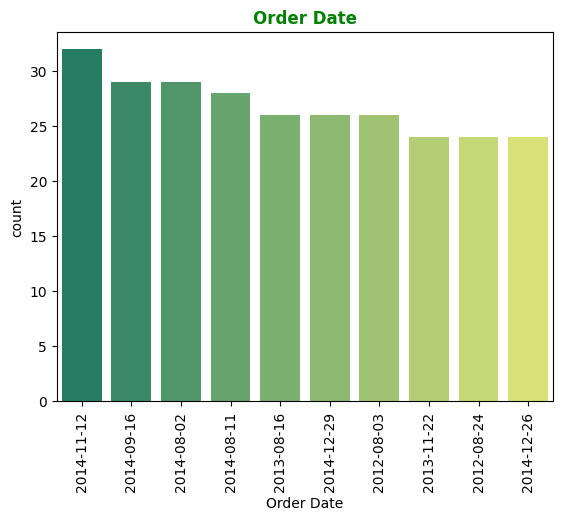

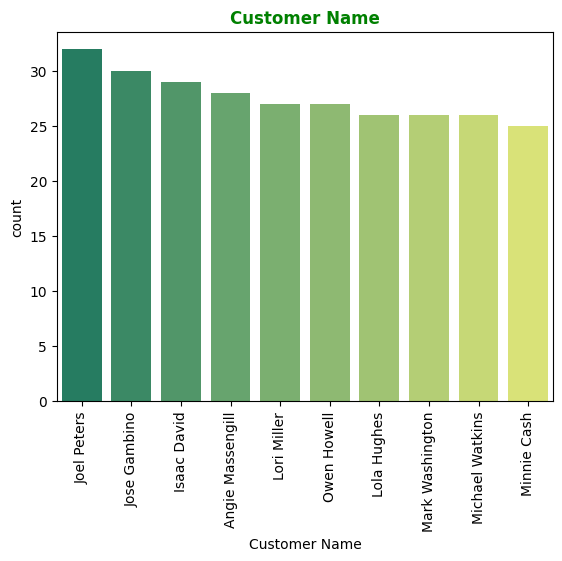

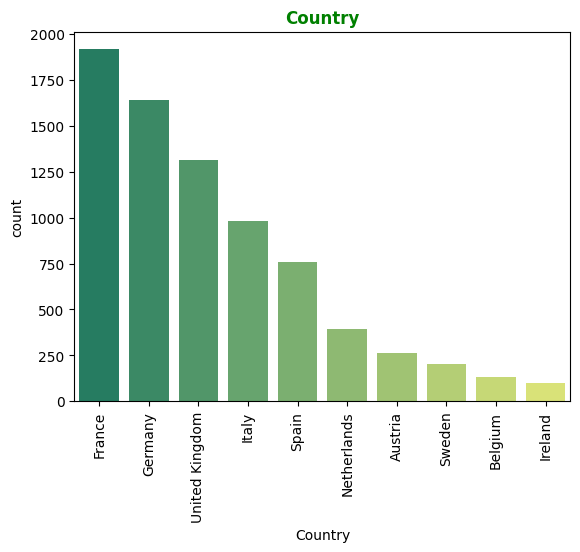

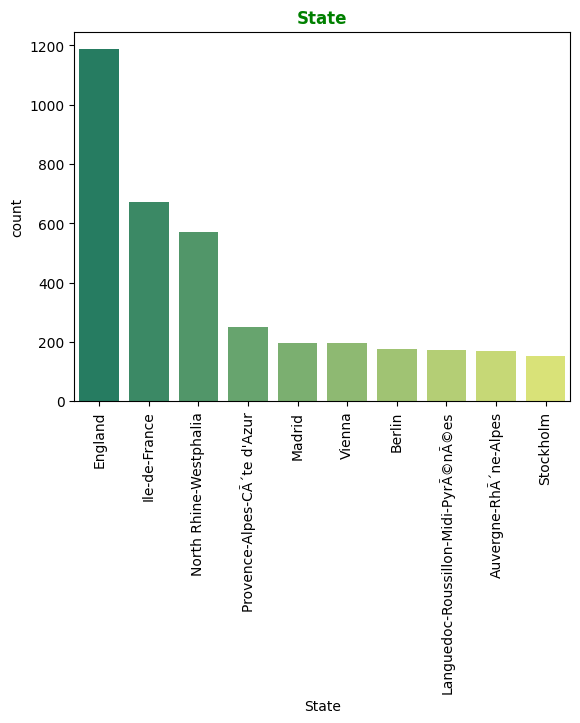

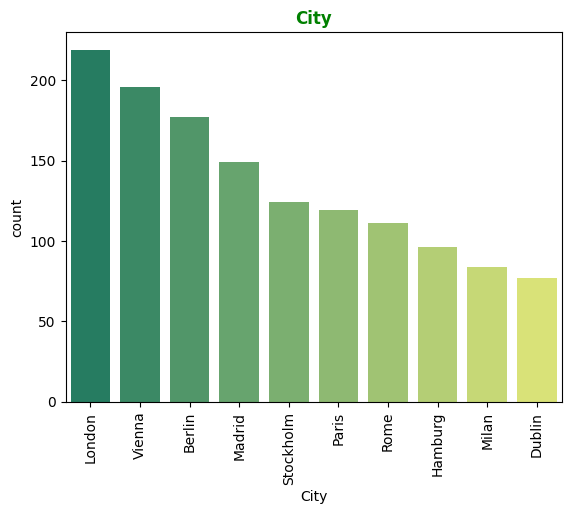

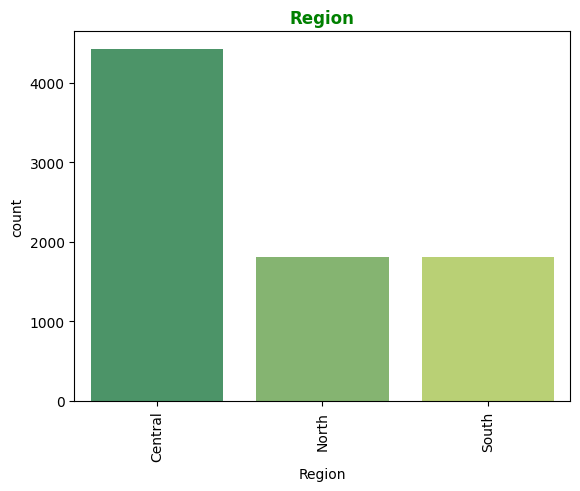

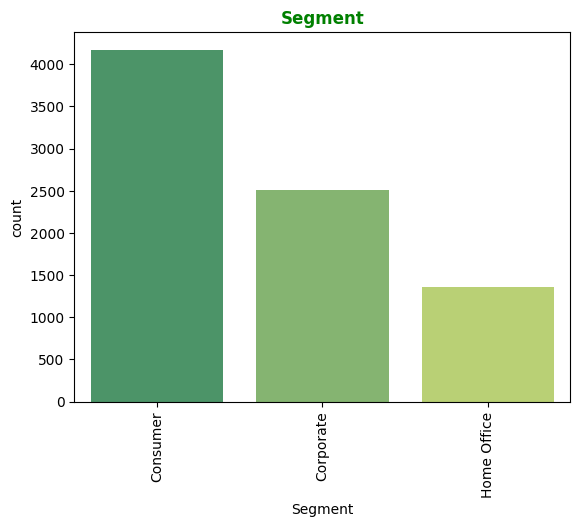

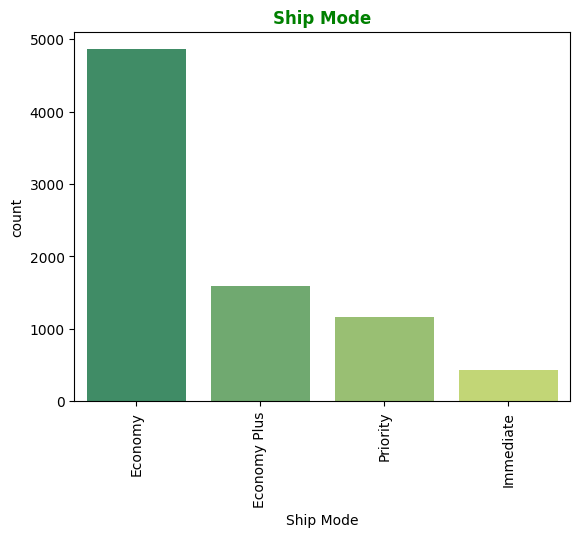

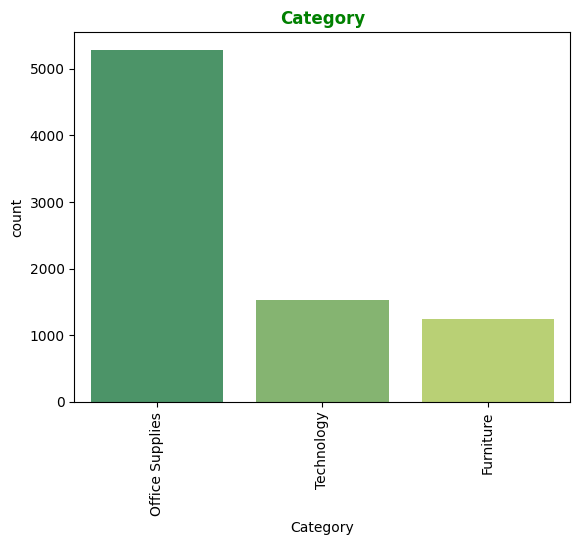

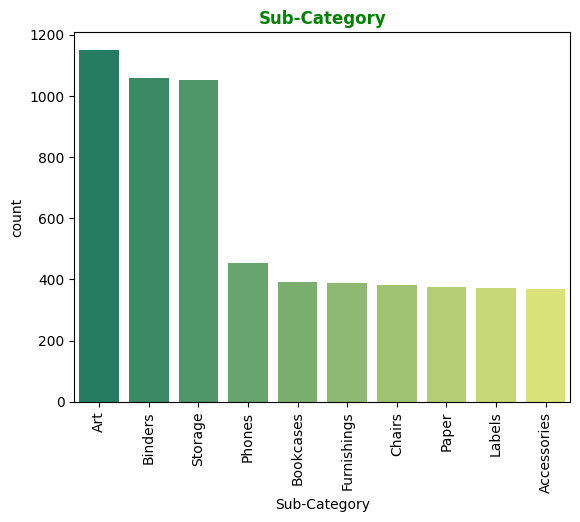

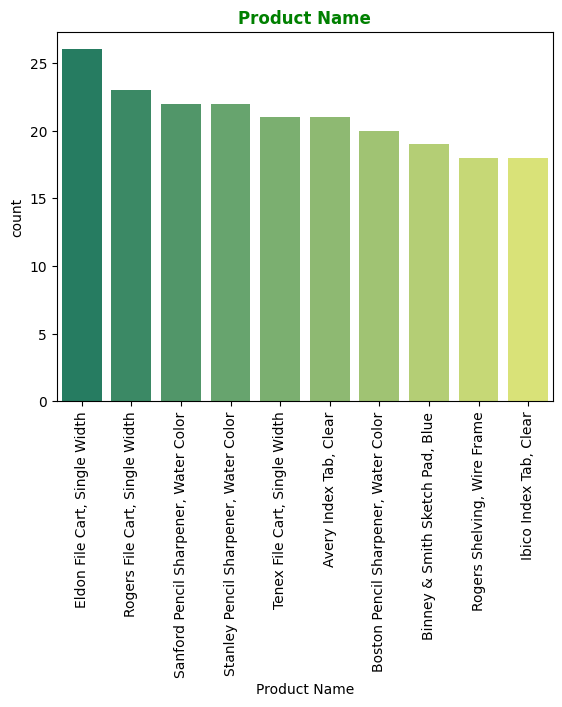

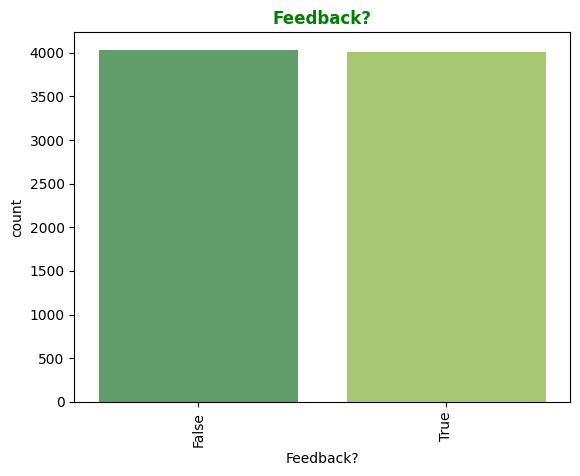

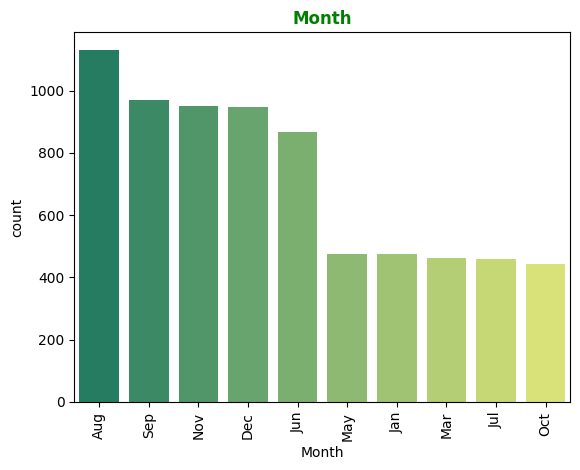

In [30]:
for col in cat:
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data = df, order=df[col].value_counts().head(10).index, palette='summer')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='green')
    plt.show()

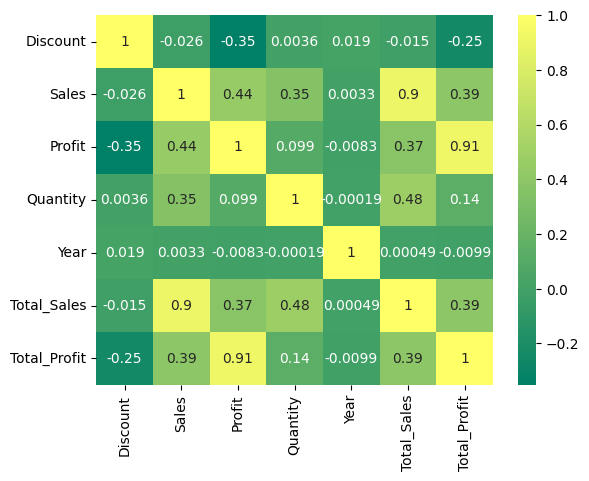

In [31]:
cor = df[num].corr('pearson')
sns.heatmap(cor, annot=True, cmap='summer')
plt.show()

### **Finding the Insights**

In [32]:
# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
print(f'Net Sales {df['Sales'].sum()}')

Net Sales 2348361


In [34]:
print(f'Net Profit {df['Profit'].sum()}')

Net Profit 283202


In [35]:
print(f'Gross Sales {df['Total_Sales'].sum()}')

Gross Sales 11898620


In [36]:
print(f'Gross Profit {df['Total_Profit'].sum()}')

Gross Profit 1379880


In [37]:
print(f'Profit Margin {round(df['Total_Profit'].sum()/df['Total_Sales'].sum() * 100)} %')

Profit Margin 12 %


In [38]:
# Group data by month and calculate sum
year_analysis = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [39]:
year_analysis.style.background_gradient(cmap='Blues')

,Year,Sales,Profit,Quantity
0,2011,414348,54487,5484
1,2012,548843,66213,7096
2,2013,630140,77172,7935
3,2014,755030,85330,9833


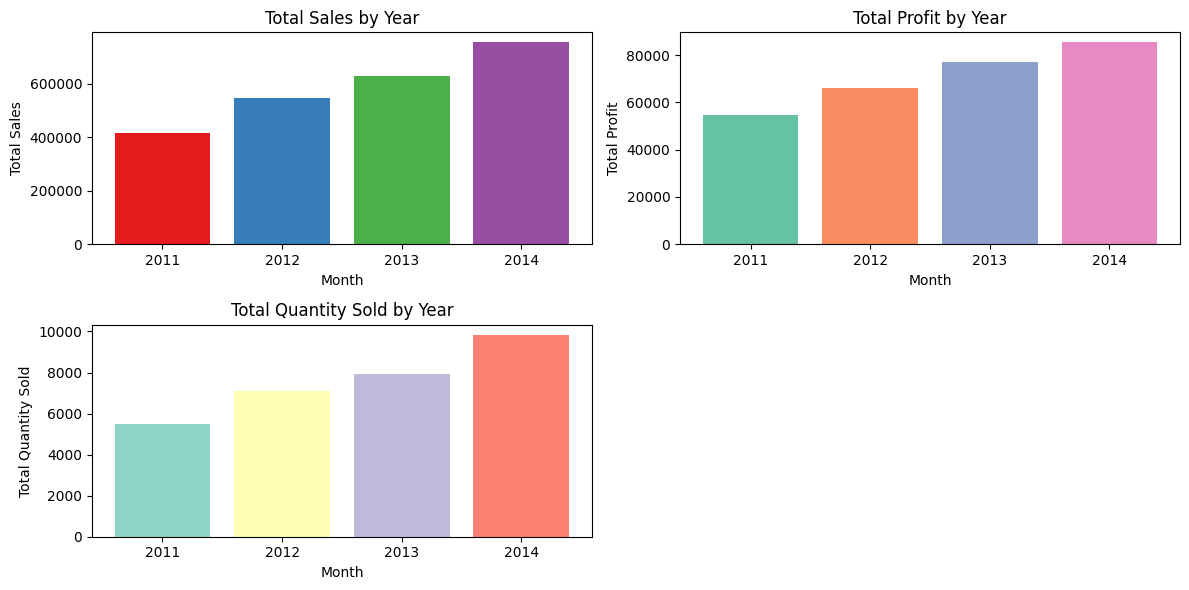

In [40]:
# Plotting
plt.figure(figsize=(12, 6))


# Sales plot
plt.subplot(2, 2, 1)
plt.bar(year_analysis['Year'], year_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks([2011,2012,2013,2014])
plt.title('Total Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(year_analysis['Year'], year_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks([2011,2012,2013,2014])
plt.title('Total Profit by Year')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(year_analysis['Year'], year_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks([2011,2012,2013,2014])
plt.title('Total Quantity Sold by Year')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [41]:
# Group data by month and calculate sum
monthly_data = df.groupby('Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [42]:
monthly_data.style.background_gradient(cmap='Greens')

,Month,Sales,Profit,Quantity
0,Api,132051,16004,1686
1,Aug,303089,38476,4207
2,Dec,272751,34103,3556
3,Feb,123685,14482,1618
4,Jan,139157,17507,1753
5,Jul,146159,16694,1695
6,Jun,271744,31769,3291
7,Mar,122875,12930,1764
8,May,142461,16171,1778
9,Nov,277239,28533,3687


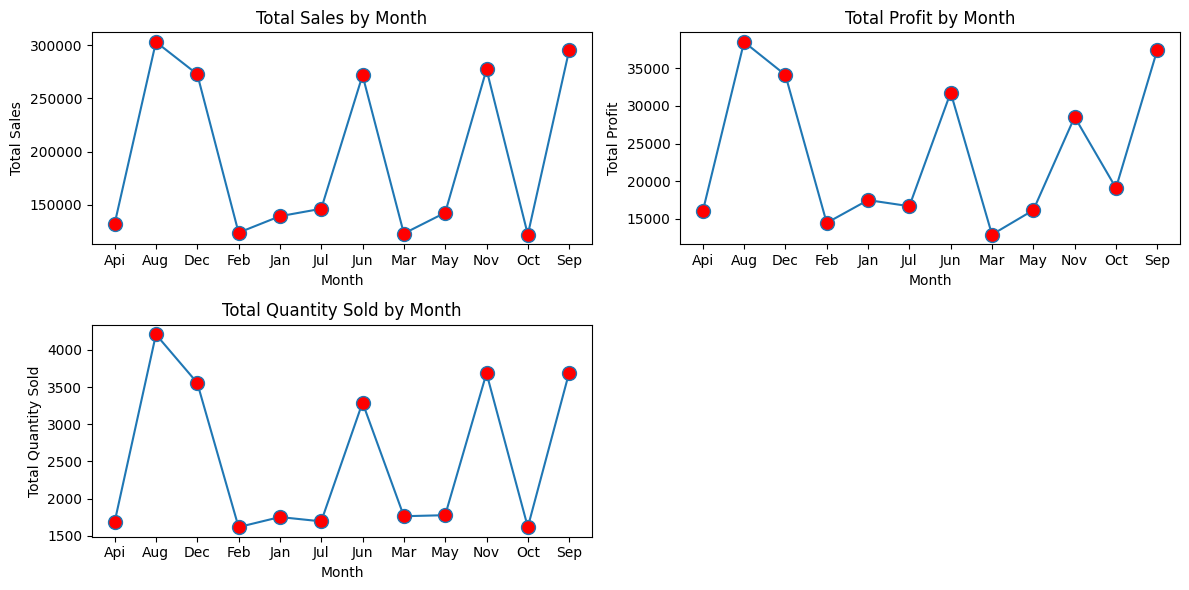

In [43]:
# Plotting
plt.figure(figsize=(12, 6))

# Sales plot
plt.subplot(2, 2, 1)
plt.plot(monthly_data['Month'], monthly_data['Sales'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.plot(monthly_data['Month'], monthly_data['Profit'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.plot(monthly_data['Month'], monthly_data['Quantity'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [44]:
# Group data by month and calculate sum
Ship_Mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [45]:
Ship_Mode_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')

,Ship Mode,Sales,Profit,Quantity
0,Economy,1412656,178658,18384
1,Economy Plus,483965,54336,6000
3,Priority,320426,32639,4405
2,Immediate,131314,17569,1559


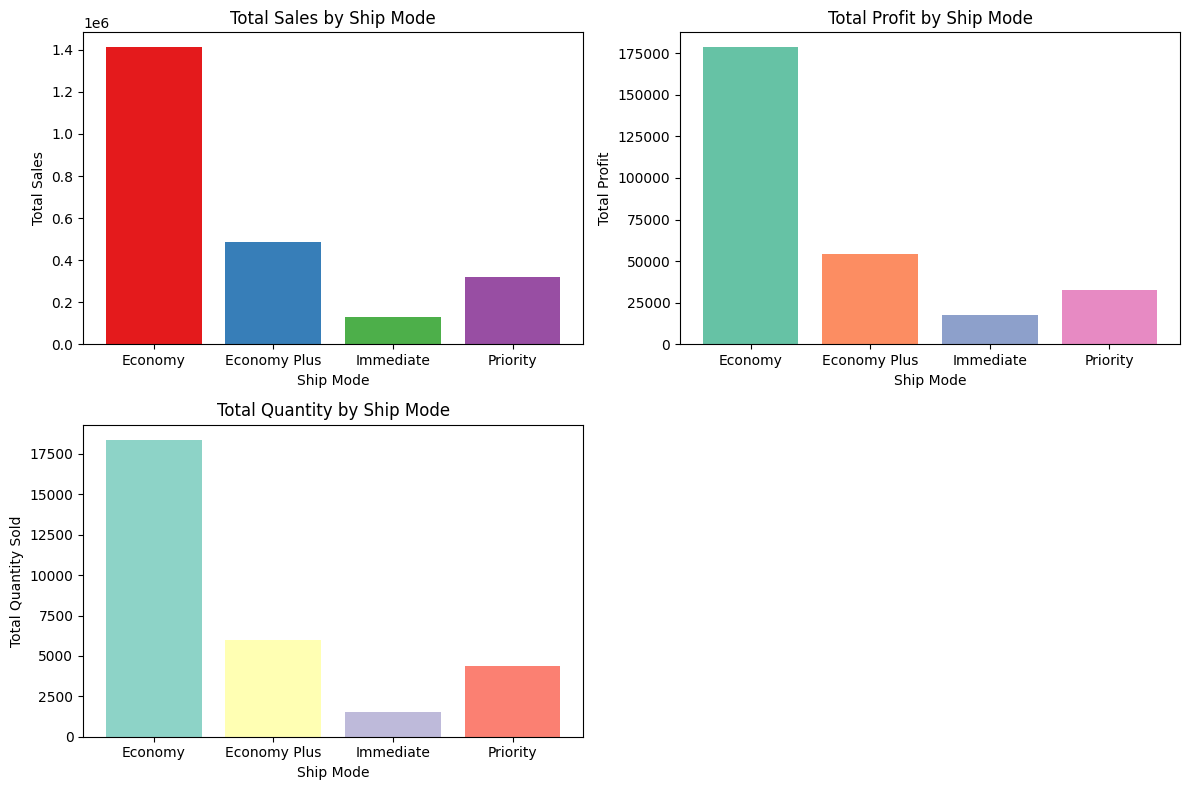

In [46]:
# Plotting
plt.figure(figsize=(12, 8))


# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [47]:
# Group data by month and calculate sum
Segment_analysis = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [48]:
Segment_analysis.sort_values(by='Sales',ascending=False).style.background_gradient(cmap='BrBG')

,Segment,Sales,Profit,Quantity
0,Consumer,1236245,147437,15713
1,Corporate,738137,92634,9498
2,Home Office,373979,43131,5137


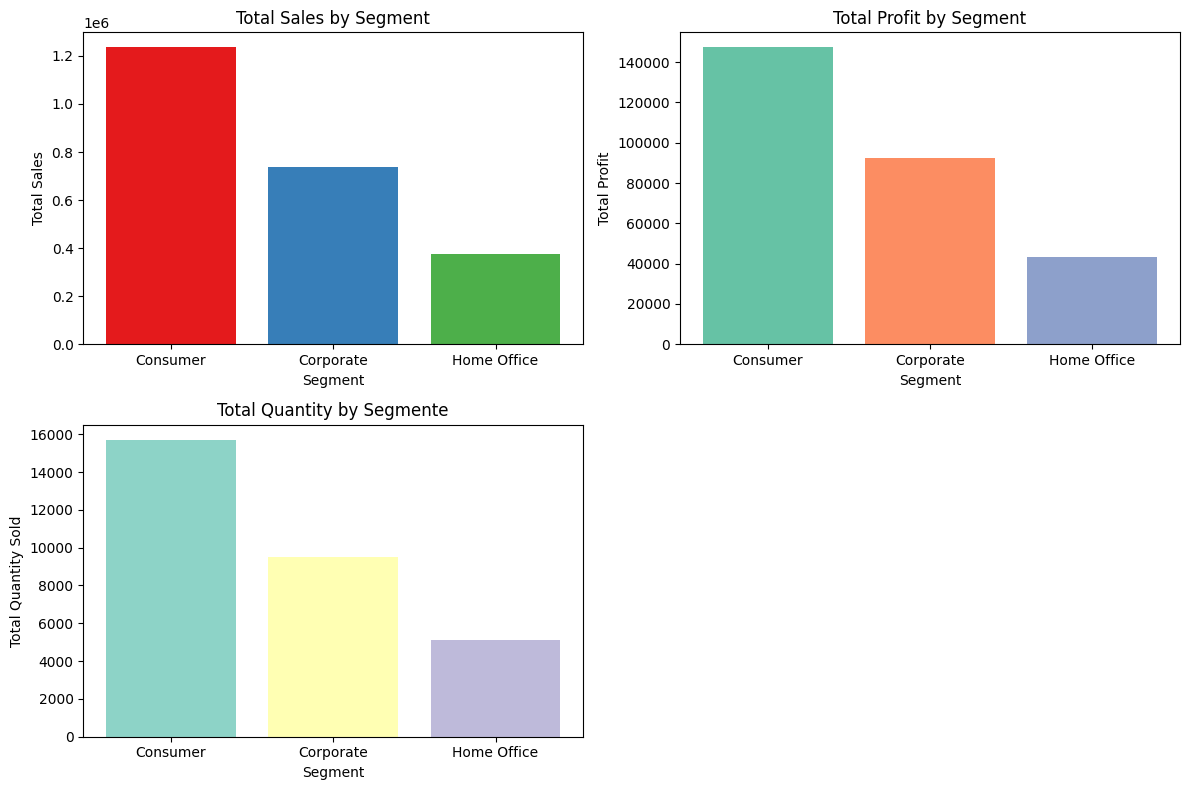

In [49]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Segmente')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [50]:
# Group data by month and calculate sum
City_analysis = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [51]:
City_analysis

,City,Sales,Profit,Quantity
0,London,69230,13931,820
1,Berlin,52555,5942,690
2,Vienna,51844,13207,714
3,Madrid,44897,11101,577
4,Paris,42245,6680,496
5,Rome,28330,191,409
6,Barcelona,27405,2246,231
7,Hamburg,23574,5858,385
8,Marseille,21677,2889,283
9,Turin,19829,1937,236


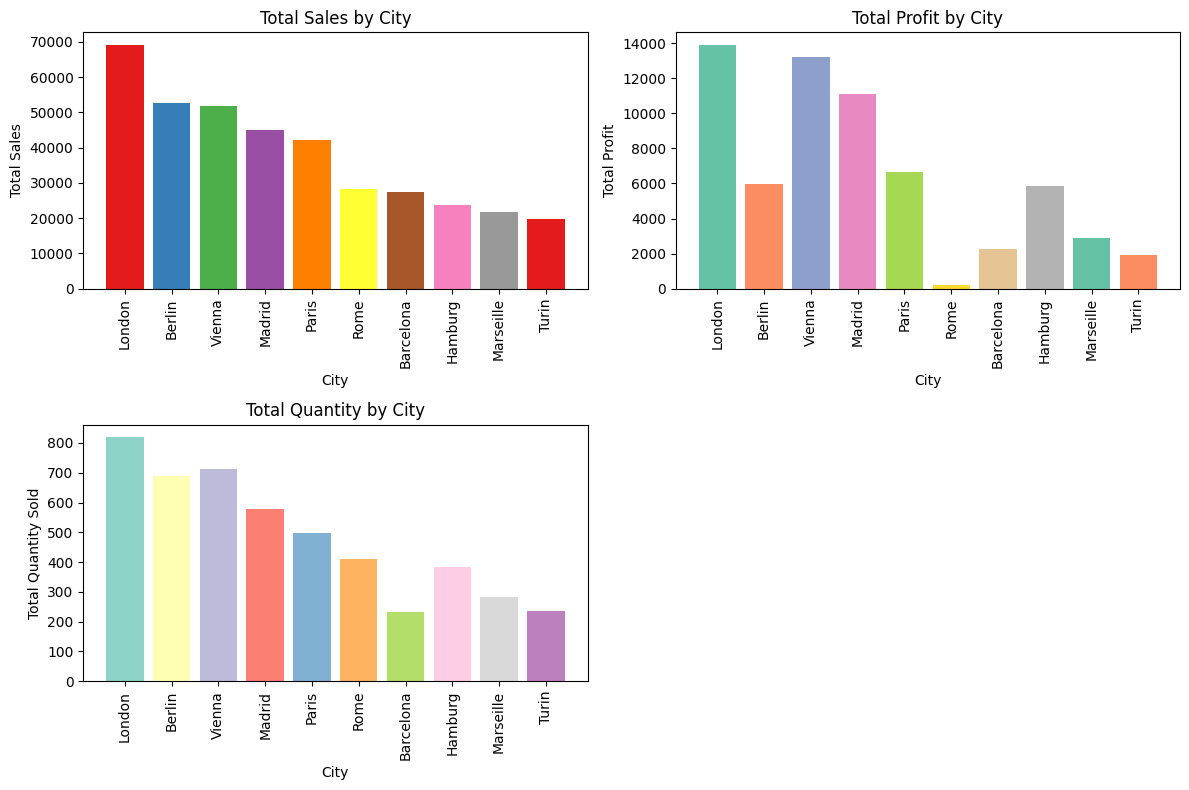

In [52]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(City_analysis['City'], City_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(City_analysis['City'], City_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(City_analysis['City'], City_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by City')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [53]:
# Group data by month and calculate sum
State_analysis = df.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [54]:
State_analysis

,State,Sales,Profit,Quantity
0,England,378984,79069,4437
1,Ile-de-France,230138,29457,2644
2,North Rhine-Westphalia,170233,32572,2083
3,Provence-Alpes-CÃ´te d'Azur,81524,11615,940
4,Madrid,57123,13245,749
5,Auvergne-RhÃ´ne-Alpes,55572,9283,658
6,Berlin,52555,5942,690
7,Nord-Pas-de-Calais-Picardie,52007,5207,547
8,Vienna,51844,13207,714
9,Bavaria,49103,9490,540


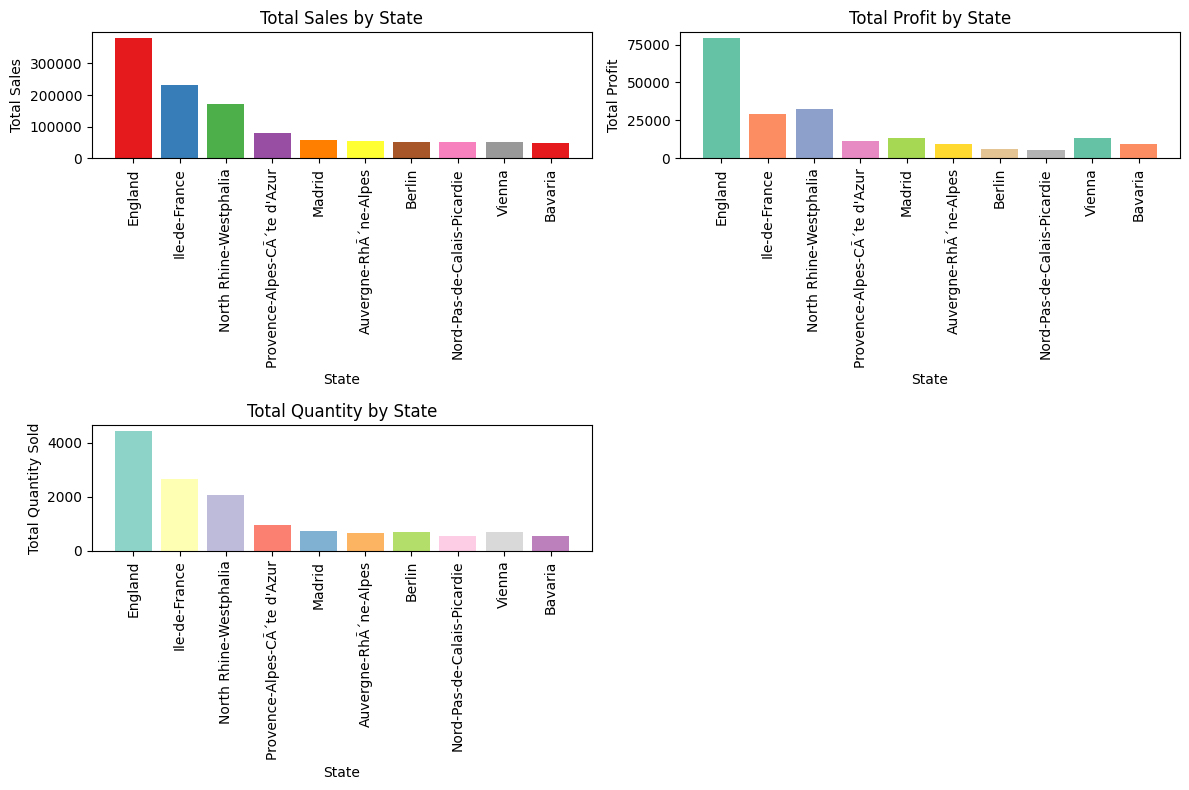

In [55]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(State_analysis['State'], State_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(State_analysis['State'], State_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(State_analysis['State'], State_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by State')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [56]:
Country_analysis = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [57]:
Country_analysis

,Country,Sales,Profit,Quantity
0,France,609683,70067,7329
1,Germany,488681,86279,6179
2,United Kingdom,420497,90382,4917
3,Italy,252742,15802,3612
4,Spain,249318,47039,2878
5,Austria,79382,21332,973
6,Netherlands,70313,-37188,1526
7,Belgium,42283,9902,529
8,Sweden,30490,-17524,753
9,Switzerland,24874,7234,308


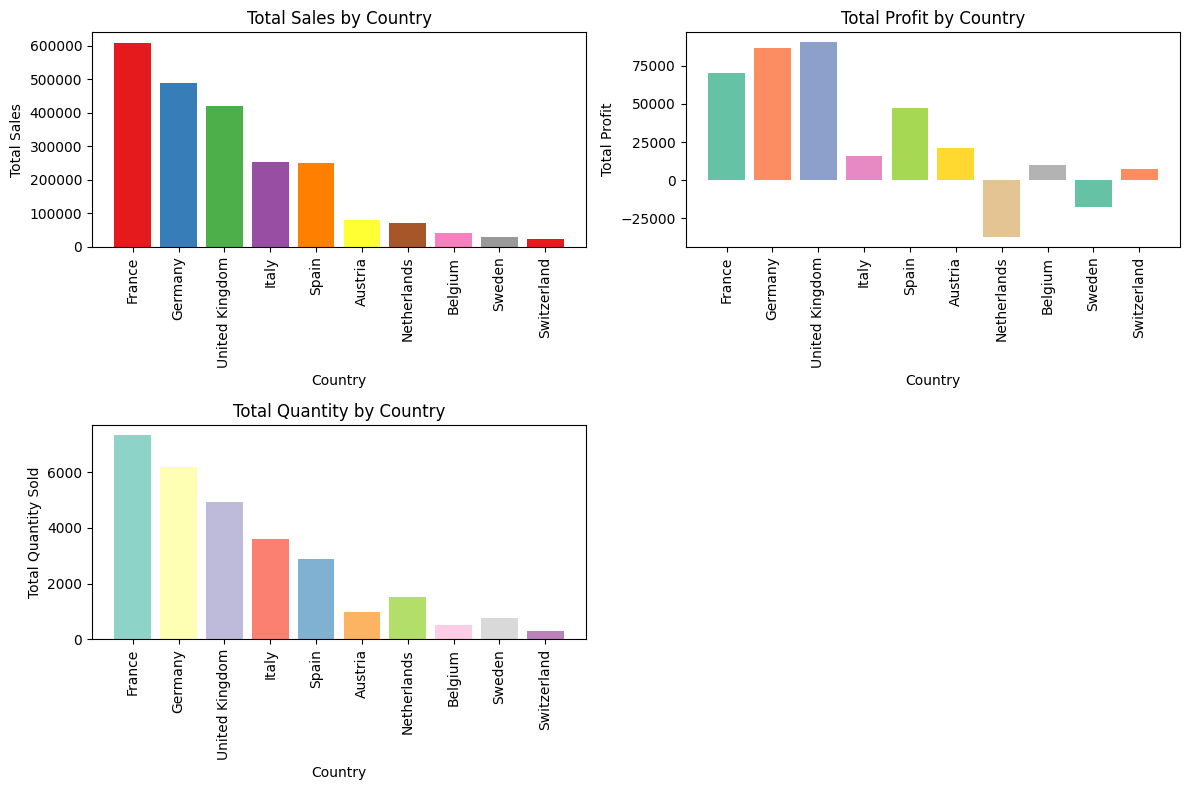

In [58]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Country_analysis['Country'], Country_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Country_analysis['Country'], Country_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Country_analysis['Country'], Country_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [59]:
region_analysis = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [60]:
region_analysis.style.background_gradient(cmap='Greens')

,Region,Sales,Profit,Quantity
0,Central,1315216,157626,16844
1,North,515979,71439,6728
2,South,517166,54137,6776


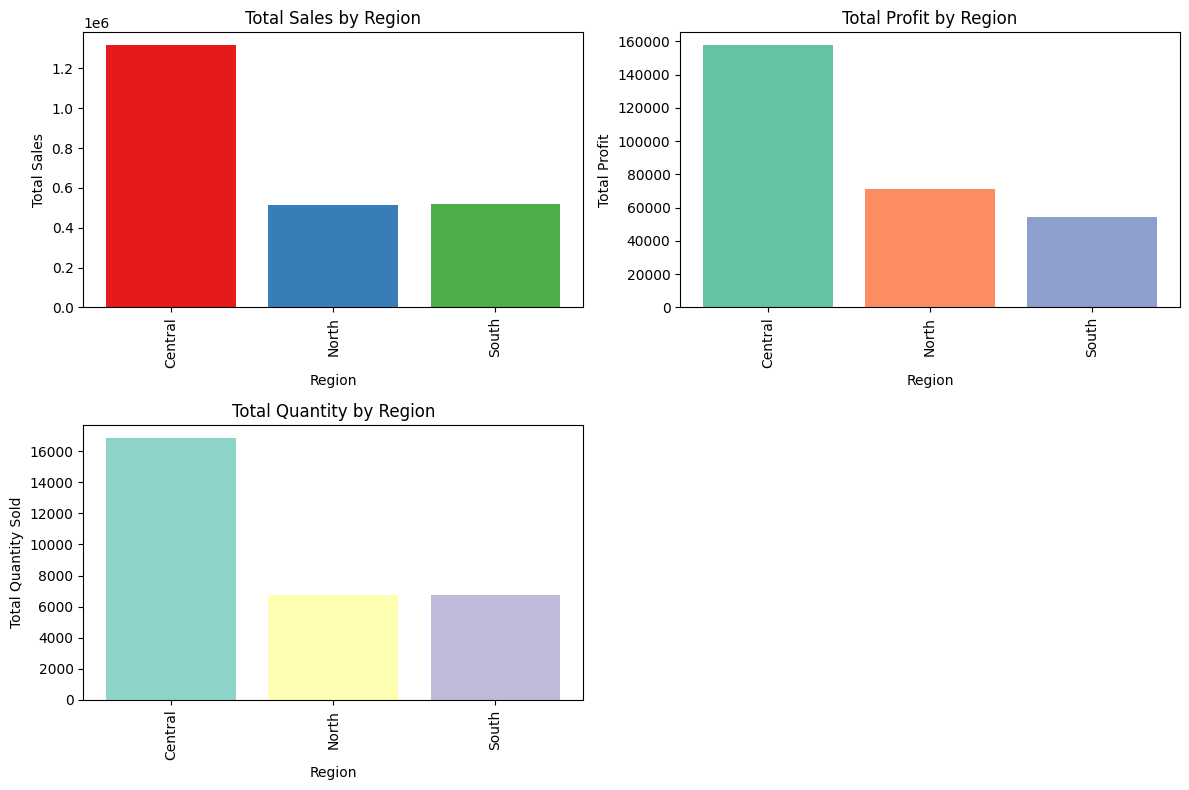

In [61]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(region_analysis['Region'], region_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(region_analysis['Region'], region_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(region_analysis['Region'], region_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [62]:
Category_analysis = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [63]:
Category_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')

,Category,Sales,Profit,Quantity
2,Technology,886015,108554,5811
1,Office Supplies,823537,124914,19896
0,Furniture,638809,49734,4641


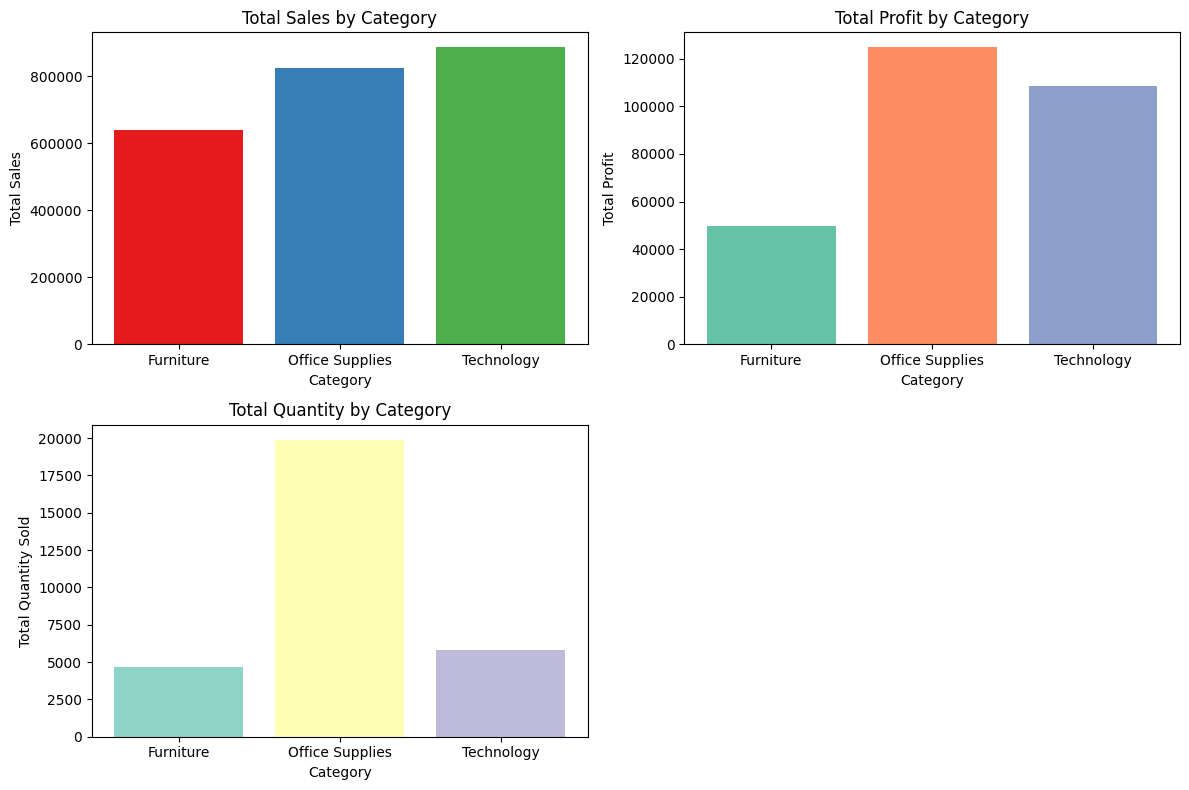

In [64]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Category_analysis['Category'], Category_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Category_analysis['Category'], Category_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Category_analysis['Category'], Category_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [65]:
Sub_Category_analysis = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [66]:
Sub_Category_analysis.style.background_gradient(cmap='BrBG')

,Sub-Category,Sales,Profit,Quantity
0,Bookcases,294396,43655,1426
1,Copiers,290081,42775,1367
2,Phones,282559,27631,1743
3,Storage,272489,21995,3887
4,Appliances,209900,37906,888
5,Chairs,186698,15489,1459
6,Machines,182066,11318,1249
7,Accessories,131309,26830,1452
8,Art,127147,23481,4326
9,Tables,89478,-20731,287


In [67]:
Sub_Category_analysis.query('Quantity == Quantity.max()')

,Sub-Category,Sales,Profit,Quantity
8,Art,127147,23481,4326


In [68]:
df.columns

Index(['Order Date', 'Customer Name', 'Country', 'State', 'City', 'Region',
       'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?', 'Year', 'Month',
       'Total_Sales', 'Total_Profit'],
      dtype='object')

In [69]:
df.groupby('Product Name')['Quantity'].count().sort_values(ascending=False).head(10).to_frame().reset_index()

,Product Name,Quantity
0,"Eldon File Cart, Single Width",26
1,"Rogers File Cart, Single Width",23
2,"Stanley Pencil Sharpener, Water Color",22
3,"Sanford Pencil Sharpener, Water Color",22
4,"Tenex File Cart, Single Width",21
5,"Avery Index Tab, Clear",21
6,"Boston Pencil Sharpener, Water Color",20
7,"Binney & Smith Sketch Pad, Blue",19
8,"Rogers Shelving, Wire Frame",18
9,"Ibico Index Tab, Clear",18


In [76]:
discount_analysis = df.groupby('Discount').agg({
    'Sales': 'mean',
    'Profit': 'mean',
}).sort_values(by='Sales', ascending=False).reset_index()

In [77]:
discount_analysis

,Discount,Sales,Profit
0,45.00,"1,273.50",-552.00
1,35.00,"1,270.11",-225.14
2,15.00,668.52,58.01
3,70.00,609.67,-916.17
4,85.00,555.00,"-1,925.00"
5,10.00,435.48,72.68
6,65.00,389.86,-375.71
7,20.00,334.93,15.50
8,40.00,261.17,-78.64
9,0.00,251.22,63.81


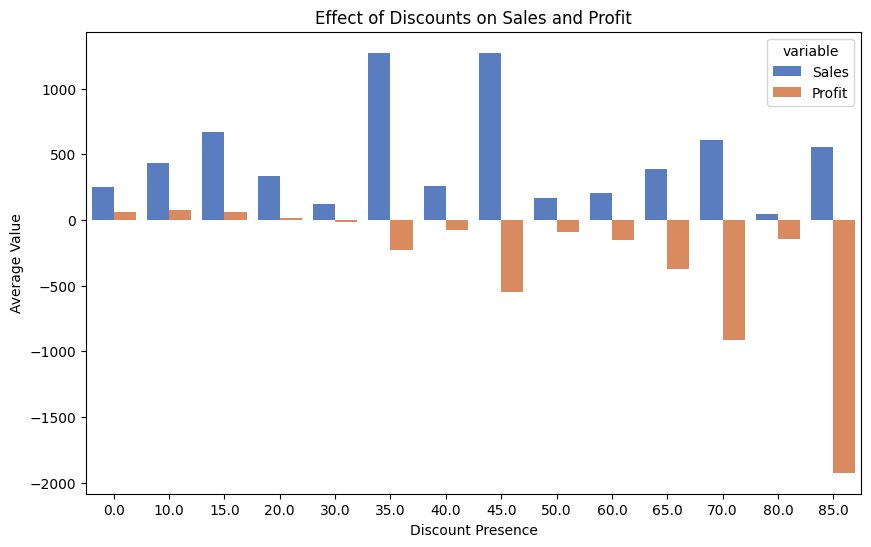

In [75]:
# Group data by 'Discount' and calculate average sales and profit for each group
discount_analysis = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Discount'), palette='muted')

# Adding labels and title
plt.xlabel('Discount Presence')
plt.ylabel('Average Value')
plt.title('Effect of Discounts on Sales and Profit')

# Display the plot
plt.show()

In [73]:
df.groupby(['Feedback?', 'Product Name'])['Quantity'].count().sort_values(ascending=False).head(10)

Feedback?  Product Name                          
True       Eldon File Cart, Single Width             14
False      Rogers File Cart, Single Width            14
           Avery Index Tab, Clear                    14
True       Sanford Pencil Sharpener, Water Color     13
           Nokia Smart Phone, Full Size              13
False      Stanley Pencil Sharpener, Water Color     12
           Eldon File Cart, Single Width             12
True       Tenex File Cart, Single Width             12
           Fellowes Box, Industrial                  11
False      Binney & Smith Sketch Pad, Water Color    11
Name: Quantity, dtype: int64

In [74]:
# Group data by 'Product Name' and calculate total quantity sold for each product
product_quantity = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort the data by total quantity in descending order
product_quantity_sorted = product_quantity.sort_values(by='Quantity', ascending=False)

# Get the top 5 best-selling products
top_5_products = product_quantity_sorted.head(5)

# Display the top 5 best-selling products
print(top_5_products)

                               Product Name  Quantity
1367         Rogers File Cart, Single Width       108
582           Eldon File Cart, Single Width       104
293         Binney & Smith Sketch Pad, Blue        90
1645  Stanley Pencil Sharpener, Water Color        89
183                  Avery Index Tab, Clear        81


In [78]:
feedback_counts = df.groupby(['Product Name', 'Category']).agg({'Feedback?': 'count'}).reset_index()

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback?', ascending=False)

print("Products or categories with the most feedback:")
print(feedback_counts_sorted.head(10))

Products or categories with the most feedback:
                               Product Name         Category  Feedback?
582           Eldon File Cart, Single Width  Office Supplies         26
1367         Rogers File Cart, Single Width  Office Supplies         23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies         22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies         22
1732          Tenex File Cart, Single Width  Office Supplies         21
183                  Avery Index Tab, Clear  Office Supplies         21
311    Boston Pencil Sharpener, Water Color  Office Supplies         20
293         Binney & Smith Sketch Pad, Blue  Office Supplies         19
1379            Rogers Shelving, Wire Frame  Office Supplies         18
993                  Ibico Index Tab, Clear  Office Supplies         18


In [80]:
true_feedback = df[df['Feedback?'] == 'True']
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head()

Product Name
Eldon File Cart, Single Width            14
Nokia Smart Phone, Full Size             13
Sanford Pencil Sharpener, Water Color    13
Tenex File Cart, Single Width            12
Ibico Index Tab, Clear                   11
Name: Feedback?, dtype: int64

In [81]:
true_feedback = df[df['Feedback?'] == 'False']
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head()

Product Name
Avery Index Tab, Clear                   14
Rogers File Cart, Single Width           14
Eldon File Cart, Single Width            12
Stanley Pencil Sharpener, Water Color    12
Boston Pencil Sharpener, Water Color     11
Name: Feedback?, dtype: int64

In [82]:
discount_analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index().sort_values(by='Sales', ascending=False).style.background_gradient(cmap='Blues')
discount_analysis

,Ship Mode,Sales,Profit
2,Immediate,308.248826,41.241784
1,Economy Plus,304.380503,34.173585
0,Economy,290.669959,36.760905
3,Priority,274.102652,27.920445


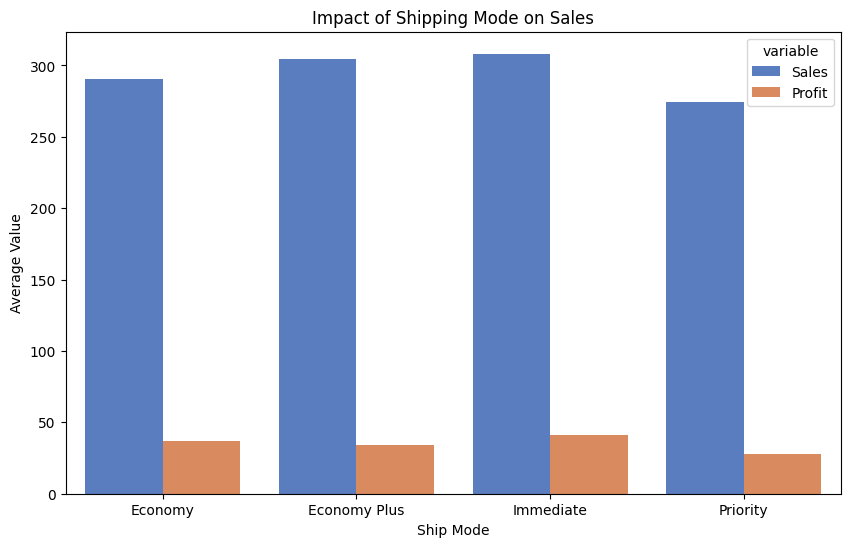

In [83]:
# Group data by 'Discount' and calculate average sales and profit for each group
discount_analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Ship Mode'), palette='muted')

# Adding labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Average Value')
plt.title('Impact of Shipping Mode on Sales')

# Display the plot
plt.show()